In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# !pip install squidpy

In [3]:
!nvidia-smi

Sun Apr 21 18:45:46 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [5]:
# Pip install method (recommended)

!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.6/78.2 GB disk)


In [6]:
from ultralytics import YOLO

from IPython.display import display, Image

In [7]:
%cd {HOME}
!yolo task=segment mode=predict model=yolov8s-seg.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=true

/content
100% 22.8M/22.8M [00:00<00:00, 236MB/s]
2024-04-21 18:48:07.662913: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-21 18:48:07.662966: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-21 18:48:07.771365: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-21 18:48:09.090851: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11810560 parameters, 0 gradients, 42.6 GFLOPs

100% 104k/104k [0

/content


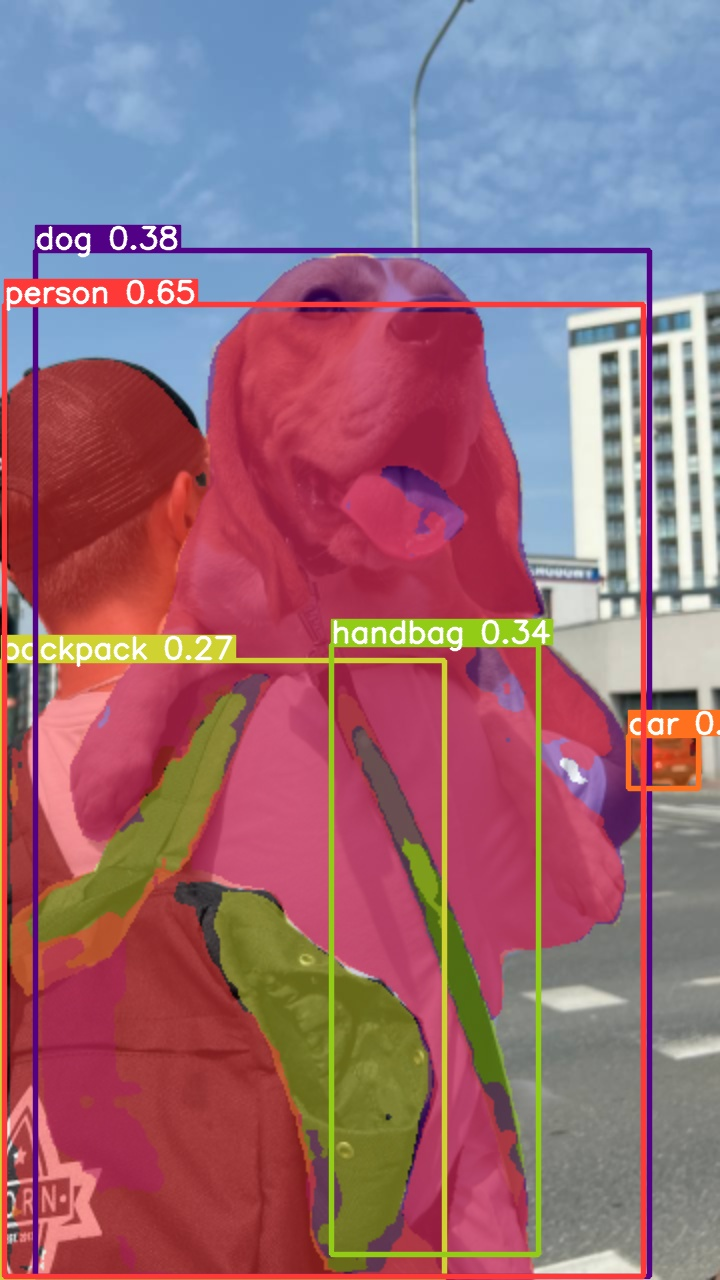

In [8]:
%cd {HOME}
Image(filename='runs/segment/predict/dog.jpeg', height=600)

In [1]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow


from roboflow import Roboflow
rf = Roboflow(api_key="KpUJ4kedPjCqnDm8N2zh")
project = rf.workspace("booleanlab").project("crypt_segmentation_2")
version = project.version(1)
dataset = version.download("yolov8")


mkdir: cannot create directory ‘{HOME}/datasets’: No such file or directory
[Errno 2] No such file or directory: '{HOME}/datasets'
/content
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.28, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to crypt_segmentation_2-1 in yolov8:: 100%|██████████| 562/562 [00:00<00:00, 4412.52it/s]


In [ ]:
#Define a project --> Destination directory for all results
projects = "/content/drive/MyDrive/Project/spatial/result_new"
#Define subdirectory for this specific training
name = "100_epochs-" #note that if you run the training again, it creates a directory: 200_epochs-2

In [ ]:
%cd  {HOME}

!yolo task=segment mode=train model=yolov8m-seg.pt data={dataset.location}/data.yaml epochs=200 imgsz=640 batch=16 save = True project = /content/drive/MyDrive/Project/spatial/result_new

/content
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=/content/datasets/crypt_segmentation_2-1/data.yaml, epochs=200, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=/content/drive/MyDrive/Project/spatial/result_new, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras

In [ ]:
%cd  {HOME}

/content


In [ ]:
!ls {HOME}/drive/MyDrive/Project/spatial/result_new/train2

args.yaml					    results.csv  train_batch0.jpg  train_batch2.jpg
events.out.tfevents.1713575606.fd73d6323d4d.5892.0  results.png  train_batch1.jpg  weights


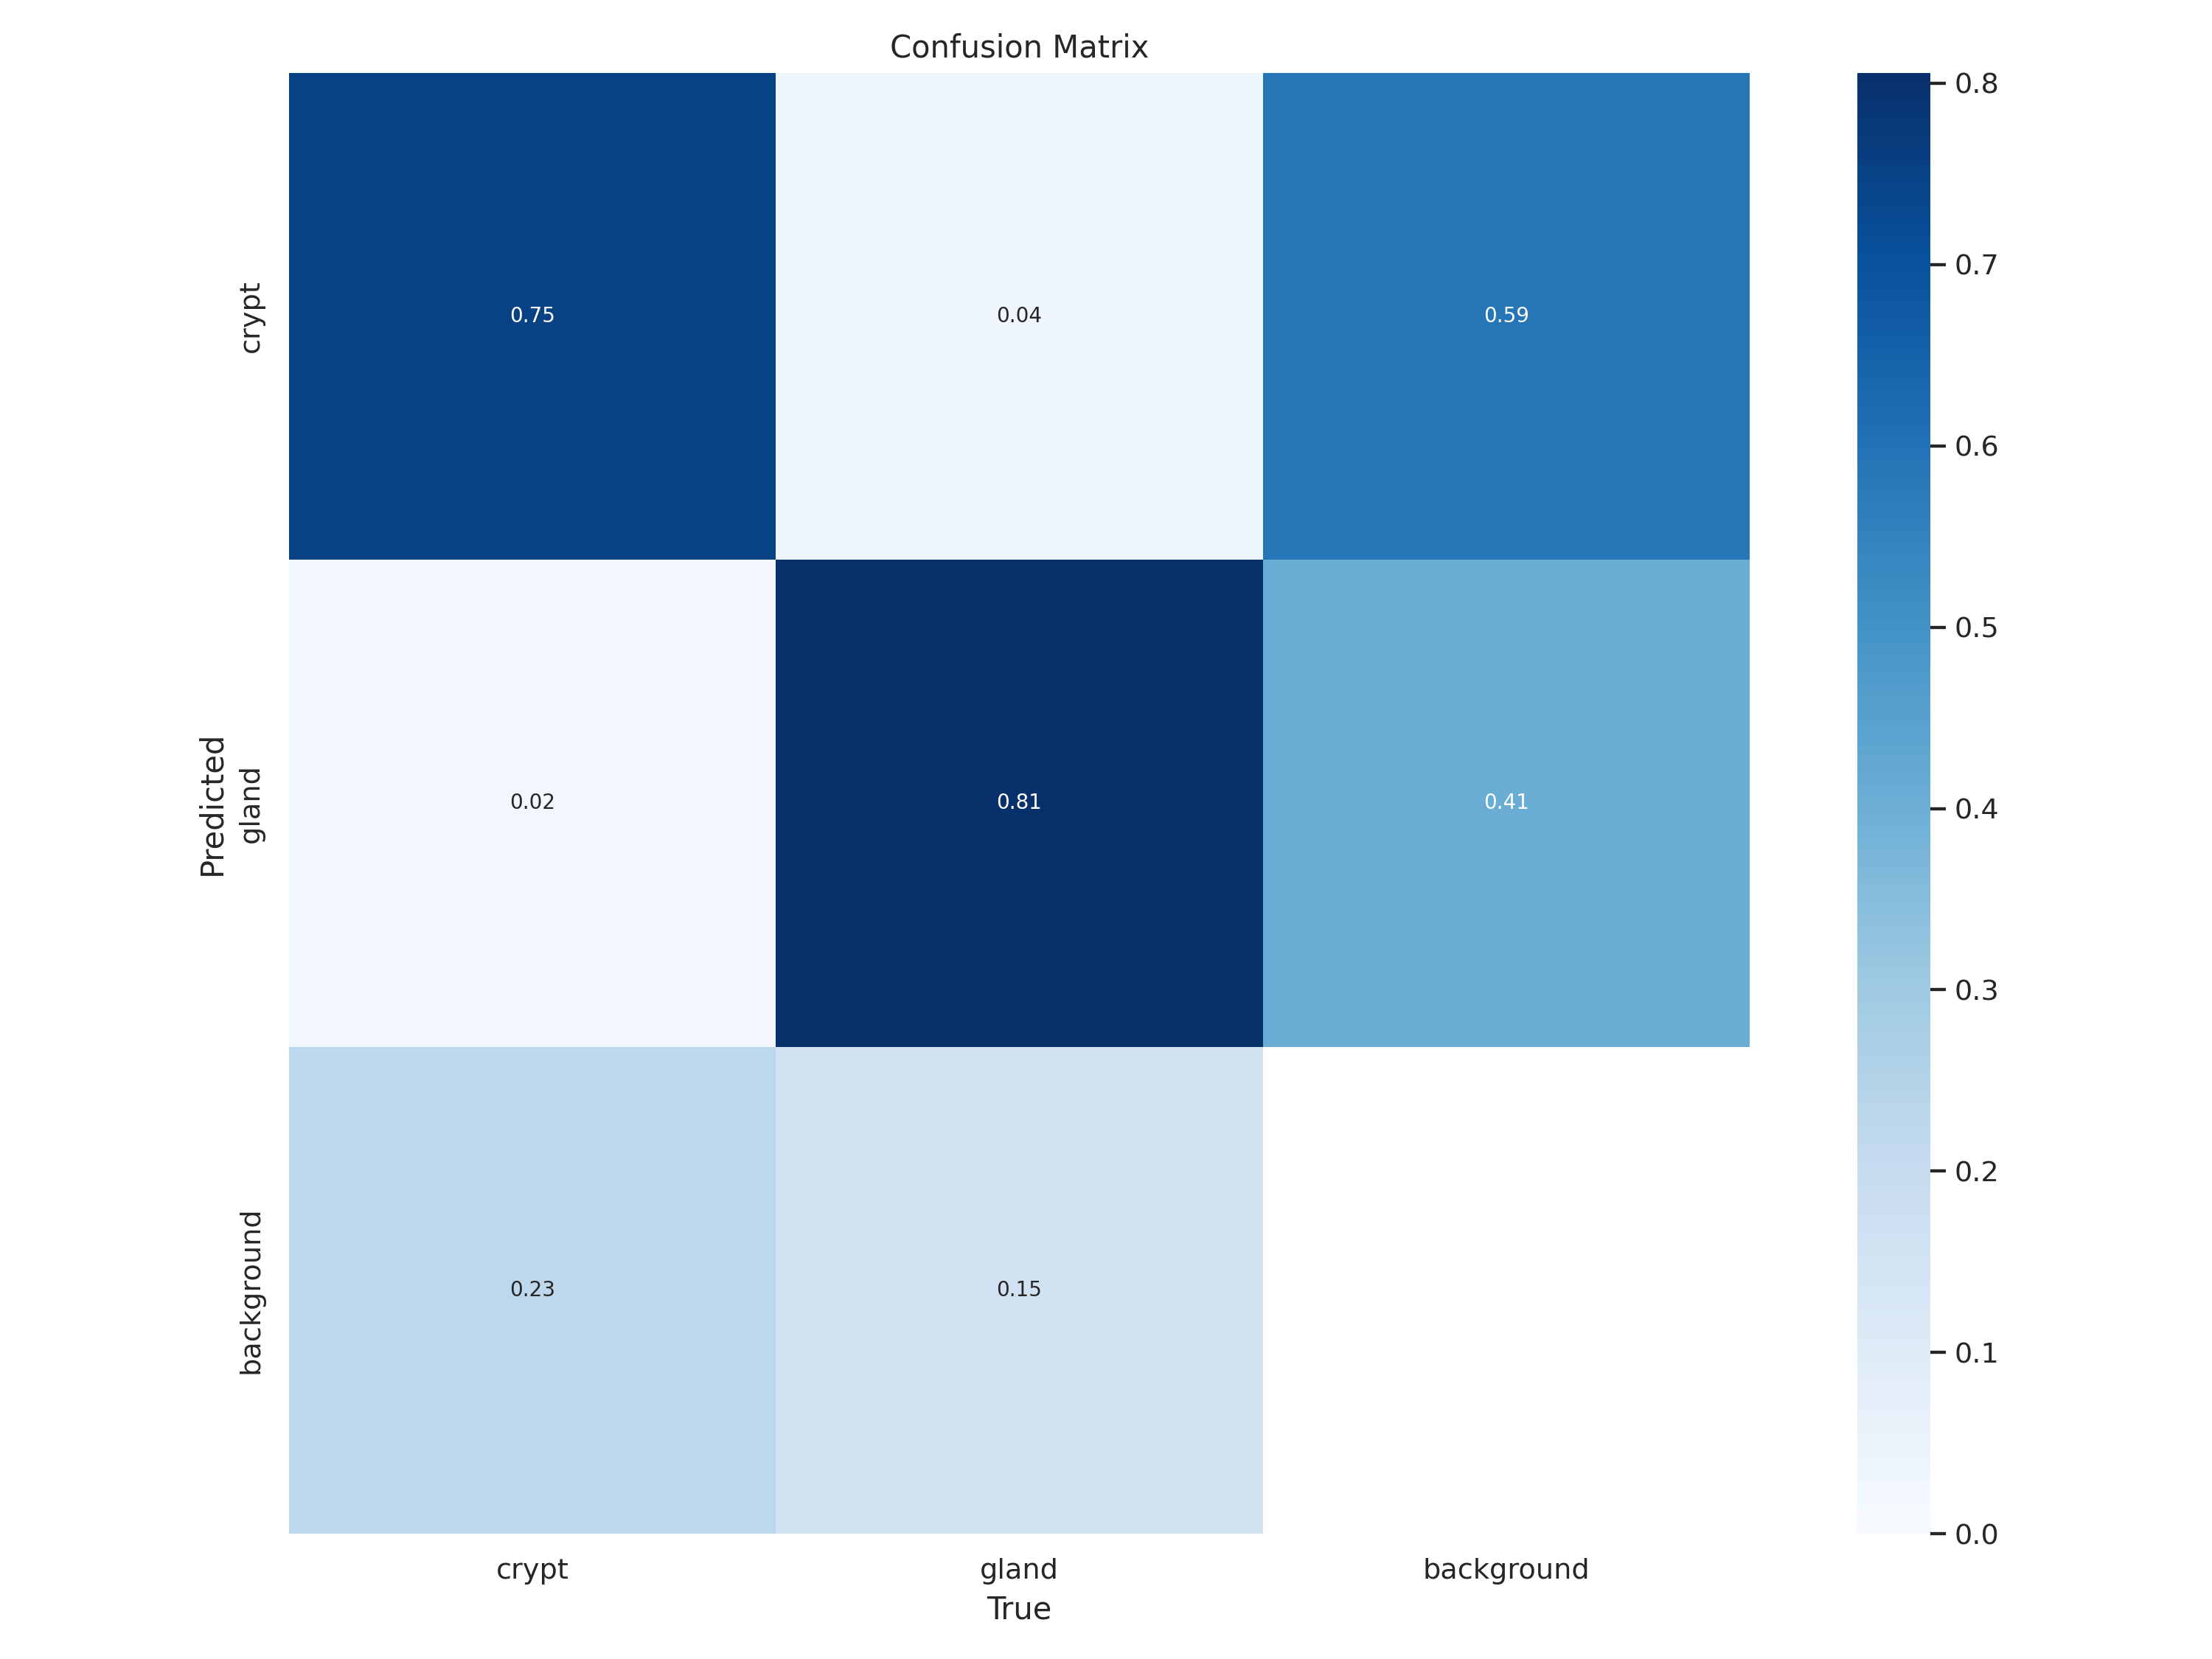

In [ ]:
Image(filename=f'{HOME}/drive/MyDrive/Project/spatial/result/train/confusion_matrix.png', width=600)

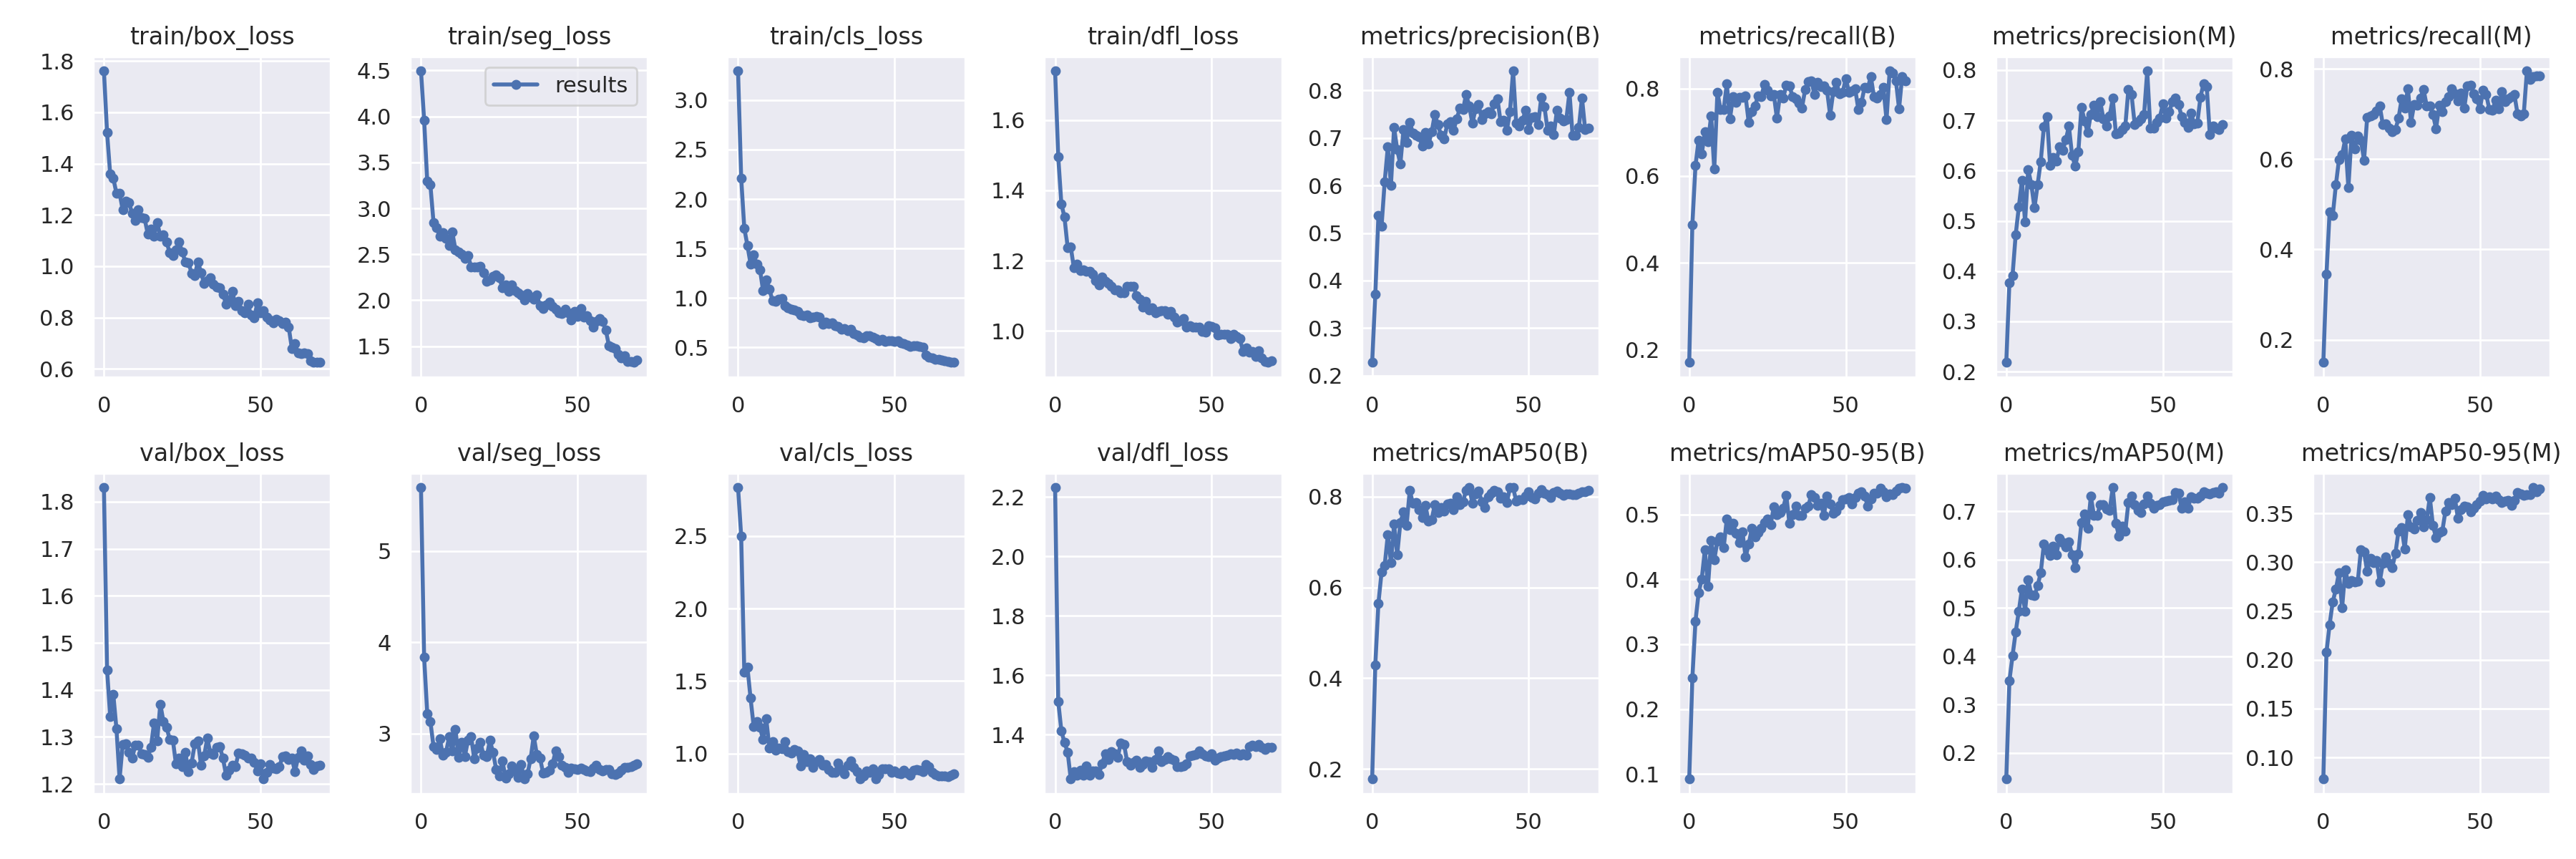

In [ ]:
Image(filename=f'{HOME}/drive/MyDrive/Project/spatial/result/train/results.png', width=600)

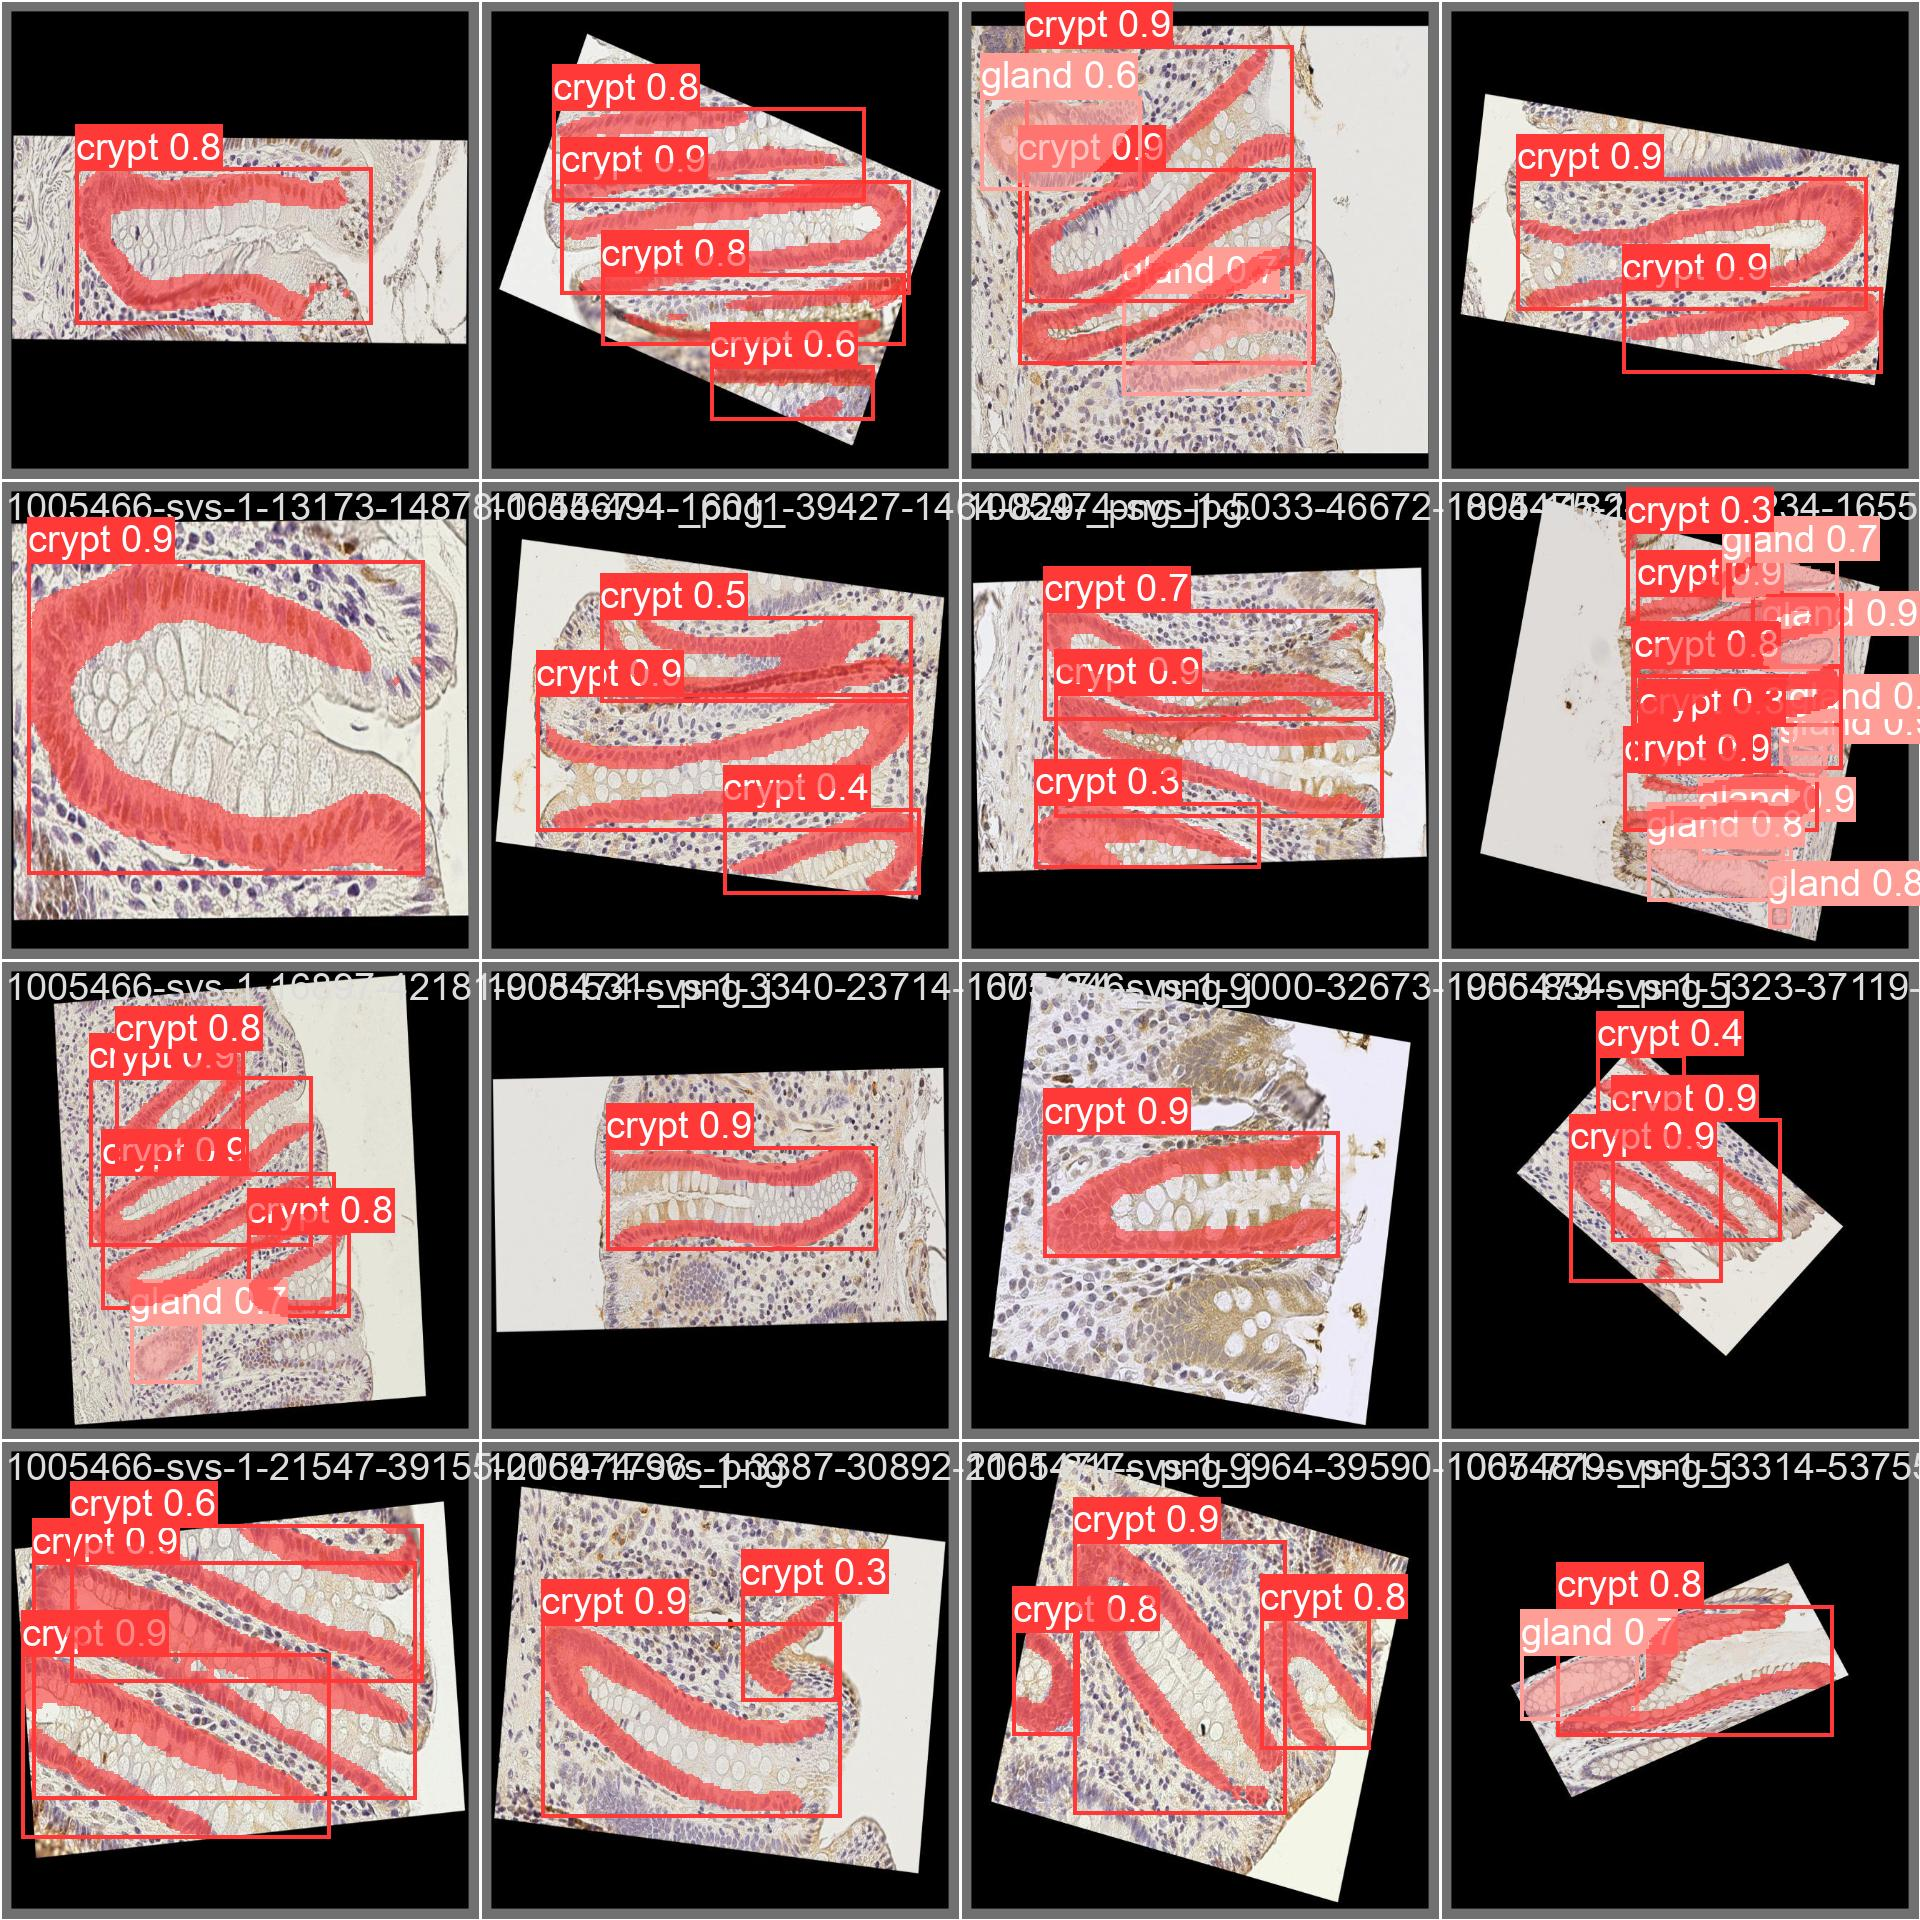

In [ ]:
Image(filename=f'{HOME}/drive/MyDrive/Project/spatial/result/train/val_batch0_pred.jpg', width=600)

In [ ]:

!yolo task=segment mode=val model={HOME}/drive/MyDrive/Project/spatial/result_new/train/weights/best.pt data={dataset.location}/data.yaml

2024-04-18 22:53:00.898319: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-18 22:53:00.898370: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-18 22:53:00.900562: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-18 22:53:01.942371: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLOv8m-seg summary (fused): 245 layers, 27223542 parameters, 0 gradients, 110.0 GFLOPs
val: Scanning /content/datasets/crypt_segmentation_2-

In [ ]:
%cd  {HOME}

/content


In [ ]:
!yolo task=segment mode=predict model=/content/drive/MyDrive/Project/spatial/result/train/weights/best.pt conf=0.5 source={dataset.location}/test_new project = /content/drive/MyDrive/Project/spatial/result_new/train2/predict_new save=true hide_labels = False hide_conf = False save_txt=True

2024-04-20 16:18:08.802281: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-20 16:18:08.802338: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-20 16:18:08.804230: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-20 16:18:09.843367: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
YOLOv8m-seg summary (fused): 245 layers, 27223542 parameters, 0 gradients, 110.0 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/16 /content/da

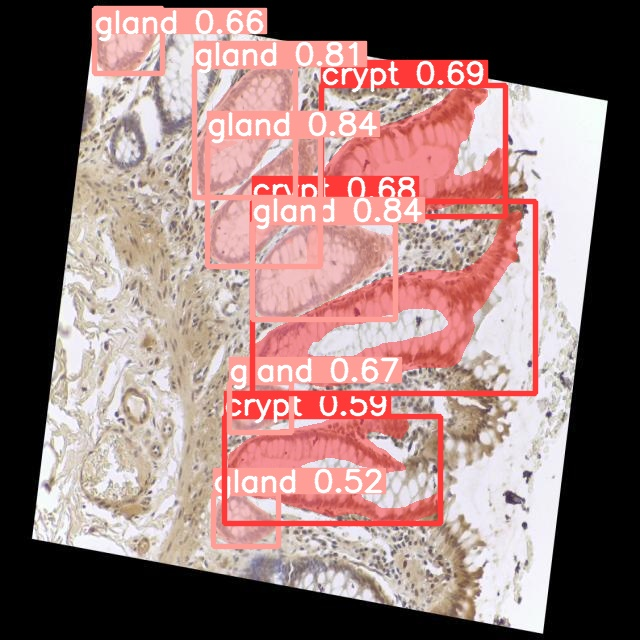

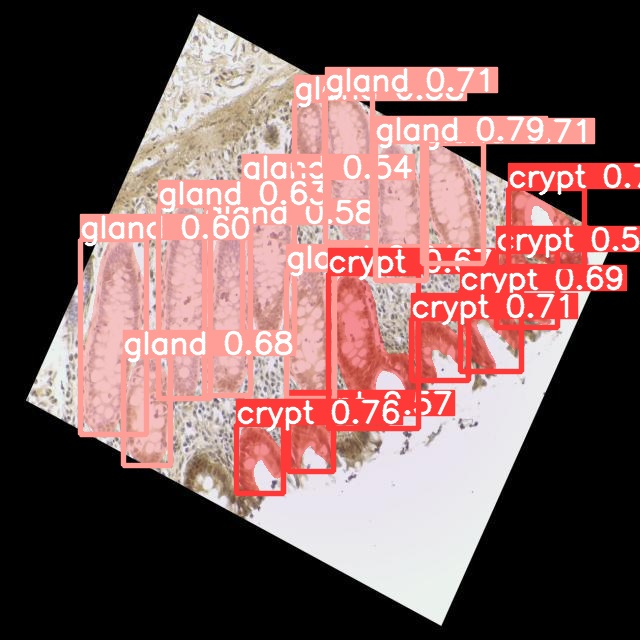

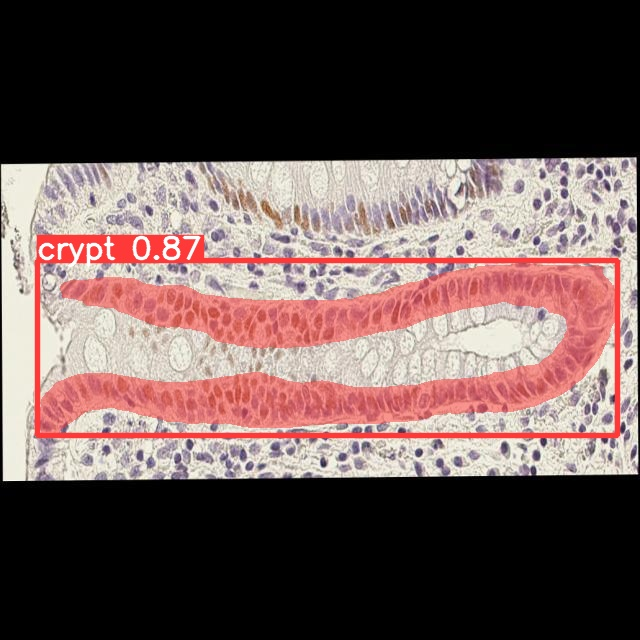

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")

Previous Code for detecting boundary boxes and finding the coordinates from the patches to the resized image.

coordinates of the detected crypts bounding boxes for the 640*640 patches

In [7]:
import cv2

# Path to your image and corresponding .txt file
# image_path = '/content/drive/MyDrive/Project/spatial/result/predict_new/predict/patch_8.jpg'
# txt_file_path = '/content/drive/MyDrive/Project/spatial/result/predict_new/predict/labels/patch_8.txt'
image_path = '/content/drive/MyDrive/ST_Deep_Vision_Project/src/spatial/result_new/train2/predict_new/predict/patch_4.jpg'
txt_file_path = '/content/drive/MyDrive/ST_Deep_Vision_Project/src/spatial/result_new/train2/predict_new/predict/labels/patch_4.txt'

# Load the image to get its dimensions
image = cv2.imread(image_path)
height, width, _ = image.shape

# Function to convert normalized coordinates to pixel coordinates
def convert_to_pixels(x_center, y_center, box_width, box_height, img_width, img_height):
    x_center *= img_width
    y_center *= img_height
    box_width *= img_width
    box_height *= img_height
    x_min = int(x_center - (box_width / 2))
    y_min = int(y_center - (box_height / 2))
    return x_min, y_min, int(box_width), int(box_height)

# Read and process the .txt file
with open(txt_file_path, 'r') as file:
    lines = file.readlines()
    for line in lines:
        parts = line.strip().split()
        class_id, x_center, y_center, box_width, box_height = map(float, parts[:5])
        x_min, y_min, w, h = convert_to_pixels(x_center, y_center, box_width, box_height, width, height)
        print(f"Class ID: {class_id}, Bounding Box: {(x_min, y_min, w, h)}")


Class ID: 0.0, Bounding Box: (306, 175, 612, 352)
Class ID: 0.0, Bounding Box: (119, 127, 236, 257)
Class ID: 0.0, Bounding Box: (166, 140, 330, 282)


coordinates of the detected bounding boxes on crypts based on the resized image (2k*1979)

In [8]:
def translate_patch_coordinates_to_resized(detected_box, patch_box, resized_size, patch_size):
    # Unpack the detected object box in the patch
    px, py, pwidth, pheight = detected_box

    # Unpack the patch's position in the resized image
    x1, y1, x2, y2 = patch_box

    # Calculate the absolute position on the resized image without further scaling
    resized_x = x1 + px
    resized_y = y1 + py
    resized_width = pwidth
    resized_height = pheight

    return (resized_x, resized_y, resized_width, resized_height)

# Example usage
detected_box = (306, 175, 612, 352)  # Object detected at this position within the patch
patch_box = (640, 0, 1280, 640) # Coordinates of the patch on the resized image

# No scaling needed, just translating to resized image context
original_coordinates = translate_patch_coordinates_to_resized(detected_box, patch_box, resized_size=(2000, 1979), patch_size=640)
print("Coordinates of detected object on resized image:", original_coordinates)

Coordinates of detected object on resized image: (946, 175, 612, 352)


coordinates of the detected bounding boxes on crypts based on the original image (47k*48k)

In [9]:
def scale_patch_coordinates_to_original(detected_box, patch_box, scale_x, scale_y):
    # Unpack the detected object box in the patch
    px, py, pwidth, pheight = detected_box

    # Unpack the patch's original position in the large image
    x1, y1, x2, y2 = patch_box

    # Calculate the absolute position in the original image
    orig_x = int(x1 + px * scale_x)
    orig_y = int(y1 + py * scale_y)
    orig_width = int(pwidth * scale_x)
    orig_height = int(pheight * scale_y)

    return (orig_x, orig_y, orig_width, orig_height)

# Example usage
detected_box = (306, 175, 612, 352)  # Object detected at this position within the patch
patch_box = (15237, 0, 30474, 15564)  # Coordinates of the patch in the original image
scale_x = 47000 / 2000  # Original width divided by resized width
scale_y = 48000 / 1979  # Original height divided by resized height

# Scale the detected object coordinates to the original image dimensions
original_coordinates = scale_patch_coordinates_to_original(detected_box, patch_box, scale_x, scale_y)
print("Original coordinates of detected object:", original_coordinates)

Original coordinates of detected object: (22428, 4244, 14382, 8537)


veryfing the coordinates for bb

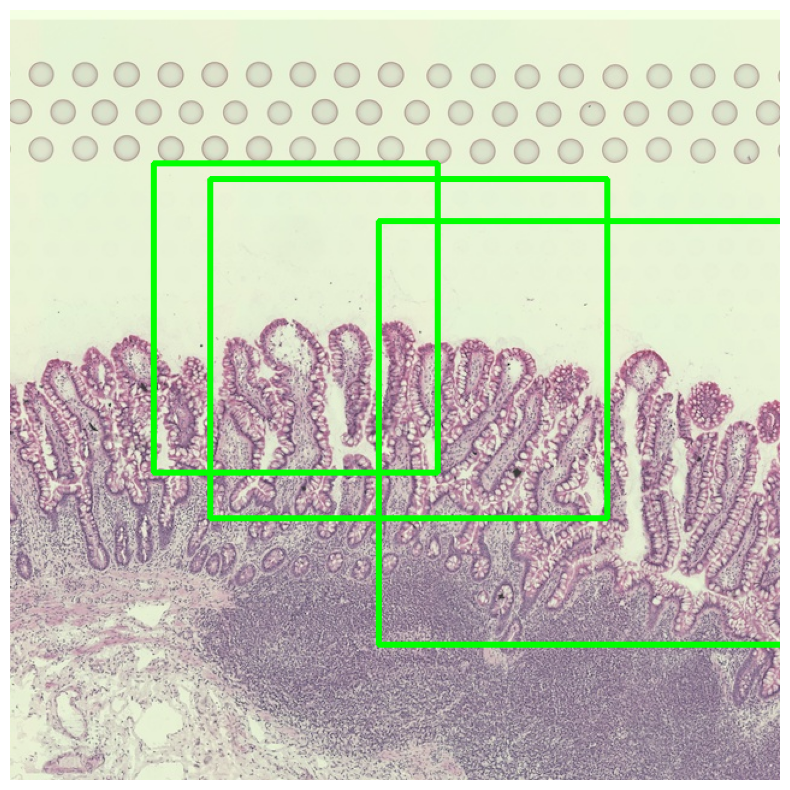

In [14]:
import cv2

# Path to your image
image_path = '/content/crypt_segmentation_2-1/test_new/patch_4.jpg'

# Load the image
image = cv2.imread(image_path)

# Example bounding box coordinates and class IDs from your output
bounding_boxes = [
    (0.0, (306, 175, 612, 352)),
    (0.0, (119, 127, 236, 257)),
    (0.0, (166, 140, 330, 282))
]

# Convert image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Draw each bounding box on the image
for class_id, (x_min, y_min, w, h) in bounding_boxes:
    # Define the rectangle's top-left and bottom-right points
    top_left = (x_min, y_min)
    bottom_right = (x_min + w, y_min + h)
    # Draw the rectangle
    cv2.rectangle(image_rgb, top_left, bottom_right, (0, 255, 0), 3)  # Green rectangle with thickness 3

# Display the image
plt.figure(figsize=(10, 10))  # You can adjust the size as needed
plt.imshow(image_rgb)
plt.axis('off')  # Hide axes
plt.show()

# Save the image to disk so it can be viewed
# output_path = '/content/drive/MyDrive/Project/output/patch_4_bboxes.jpg'
# cv2.imwrite(output_path, image)

 11002 - This is the x-coordinate of the top-left corner of the detected object within the original image (in pixels). It indicates that the object starts at this point horizontally.
7916 - This is the y-coordinate of the top-left corner of the detected object within the original image (in pixels). It indicates that the object starts at this point vertically.
6779 - This is the width of the detected object (in pixels) within the original image. It indicates how wide the object is across the horizontal dimension.
540 - This is the height of the detected object (in pixels) within the original image. It indicates the vertical size of the object from top to bottom.

Updated code

In [2]:
import squidpy as sq

The Shapely GEOS version (3.11.3-CAPI-1.17.3) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
Geopandas was set to use PyGEOS, changing to shapely 2.0 with:

	geopandas.options.use_pygeos = True

If you intended to use PyGEOS, set the option to False.


In [3]:
import matplotlib.pyplot as plt
from PIL import Image


# Increase the maximum number of pixels allowed
Image.MAX_IMAGE_PIXELS = None

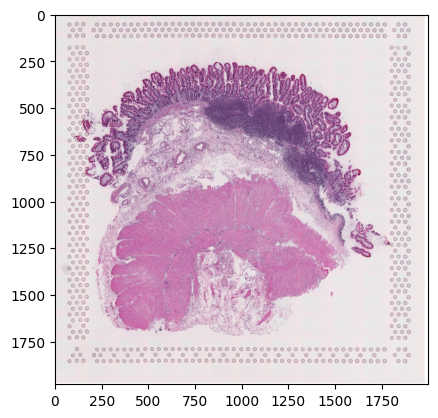

In [4]:

img = sq.im.ImageContainer('/content/drive/MyDrive/ST_Deep_Vision_Project/src/spatial/dataset/resized_image_b1.jpg')
plt.imshow(img['image'][:,:,0])

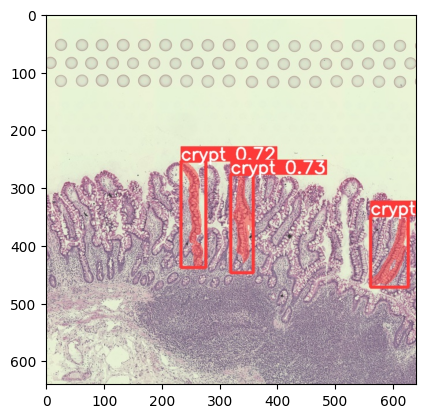

In [5]:
img2 = sq.im.ImageContainer('/content/drive/MyDrive/ST_Deep_Vision_Project/src/spatial/result_new/train2/predict_new/predict/patch_4.jpg')
plt.imshow(img2['image'][:,:,0])

this code converts normalized coordinates to pixelated coordinates for boundary boxes. We used label folder patches.txt file

In [6]:
def convert_to_pixels(normalized_coords, image_width, image_height):
    """
    Convert normalized coordinates from YOLO output to pixel coordinates.

    Args:
    normalized_coords (list of tuples): List of normalized (x, y) coordinates.
    image_width (int): Width of the original image in pixels.
    image_height (int): Height of the original image in pixels.

    Returns:
    list of tuples: List of (x, y) pixel coordinates.
    """
    pixel_coords = []
    for x_norm, y_norm in normalized_coords:
        x_pixel = int(float(x_norm) * image_width)
        y_pixel = int(float(y_norm) * image_height)
        pixel_coords.append((x_pixel, y_pixel))
    return pixel_coords

def process_file(file_path, image_width, image_height):
    bounding_boxes = []
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.split()[1:]  # Skip the label at the beginning
            normalized_coords = [(parts[i], parts[i+1]) for i in range(0, len(parts), 2)]
            bounding_boxes.append(convert_to_pixels(normalized_coords, image_width, image_height))
    return bounding_boxes

# Specify your image dimensions
image_width = 640  # Replace with your image's actual width
image_height = 640  # Replace with your image's actual height

# Load and convert coordinates from the file
bounding_boxes = process_file('/content/drive/MyDrive/ST_Deep_Vision_Project/src/spatial/result_new/train2/predict_new/predict/labels/patch_4.txt', image_width, image_height)
print(bounding_boxes)



[[(612, 352), (612, 352), (610, 352), (610, 354), (610, 362), (609, 362), (609, 366), (608, 367), (608, 372), (607, 374), (607, 377), (606, 378), (606, 380), (604, 380), (604, 384), (604, 386), (604, 390), (602, 392), (602, 394), (602, 395), (602, 396), (600, 397), (600, 398), (600, 399), (600, 400), (599, 402), (599, 402), (597, 404), (597, 406), (596, 407), (596, 409), (595, 410), (595, 410), (594, 412), (594, 412), (592, 414), (592, 415), (592, 416), (592, 418), (590, 419), (590, 420), (589, 422), (589, 422), (588, 424), (588, 424), (587, 426), (587, 427), (584, 430), (584, 430), (582, 432), (582, 432), (580, 435), (580, 436), (580, 437), (580, 438), (579, 439), (579, 440), (576, 444), (576, 444), (575, 446), (575, 447), (570, 452), (569, 452), (568, 452), (567, 452), (566, 454), (566, 455), (564, 456), (564, 459), (564, 460), (564, 464), (564, 466), (564, 468), (566, 469), (569, 469), (570, 468), (570, 468), (572, 467), (572, 467), (574, 466), (576, 466), (577, 464), (580, 464), (5

this code just verify if the predicted images and labels are correctly forming the boundary boxes or not

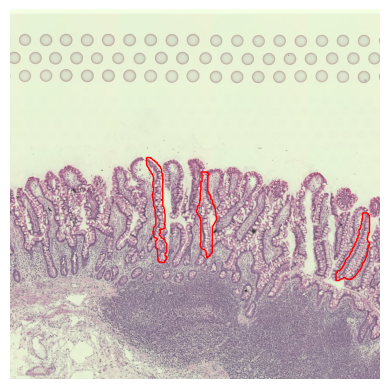

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

def convert_to_pixels(normalized_coords, image_width, image_height):
    pixel_coords = []
    for x_norm, y_norm in normalized_coords:
        x_pixel = int(float(x_norm) * image_width)
        y_pixel = int(float(y_norm) * image_height)
        pixel_coords.append((x_pixel, y_pixel))
    return pixel_coords

def process_file(file_path, image_width, image_height):
    bounding_boxes = []
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.split()[1:]  # Skip the label at the beginning
            normalized_coords = [(parts[i], parts[i+1]) for i in range(0, len(parts), 2)]
            bounding_boxes.append(convert_to_pixels(normalized_coords, image_width, image_height))
    return bounding_boxes

def plot_bounding_boxes(image_path, bounding_boxes):
    img = Image.open(image_path)
    fig, ax = plt.subplots()
    ax.imshow(img)

    for box in bounding_boxes:
        # Assuming the box is a list of (x, y) tuples
        poly = np.array(box)
        poly = np.append(poly, [poly[0]], axis=0)  # Close the polygon
        patch = patches.Polygon(poly, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(patch)

    plt.axis('off')
    plt.show()

# Example setup
file_path = '/content/drive/MyDrive/ST_Deep_Vision_Project/src/spatial/result_new/train2/predict_new/predict/labels/patch_4.txt'  # Replace with your actual file path
image_path = '/content/crypt_segmentation_2-1/test_new/patch_4.jpg'  # Replace with your actual image path
image_width = 640  # Replace with your image's actual width
image_height = 640  # Replace with your image's actual height

# Load and convert coordinates from the file
bounding_boxes = process_file(file_path, image_width, image_height)

# Plotting the image with bounding boxes
plot_bounding_boxes(image_path, bounding_boxes)


just verifying if the pixelated coordinates are correct or not!!

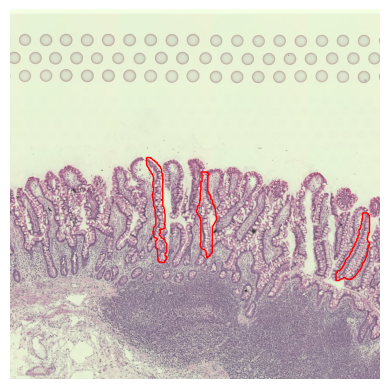

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

def plot_bounding_boxes(image_path, bounding_boxes):
    img = Image.open(image_path)
    fig, ax = plt.subplots()
    ax.imshow(img)

    for box in bounding_boxes:
        # Convert box data into a numpy array and ensure it's in the correct shape
        poly = np.array(box)
        poly = poly.reshape((-1, 2))  # Reshape to ensure two columns (x, y)
        poly = np.append(poly, [poly[0]], axis=0)  # Close the polygon by appending the first point at the end
        patch = patches.Polygon(poly, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(patch)

    plt.axis('off')
    plt.show()

# Example usage
image_path = '/content/crypt_segmentation_2-1/test_new/patch_4.jpg'  # Replace with your actual image path
bounding_boxes = [[(612, 352), (612, 352), (610, 352), (610, 354), (610, 362), (609, 362), (609, 366), (608, 367), (608, 372), (607, 374), (607, 377), (606, 378), (606, 380), (604, 380), (604, 384), (604, 386), (604, 390), (602, 392), (602, 394), (602, 395), (602, 396), (600, 397), (600, 398), (600, 399), (600, 400), (599, 402), (599, 402), (597, 404), (597, 406), (596, 407), (596, 409), (595, 410), (595, 410), (594, 412), (594, 412), (592, 414), (592, 415), (592, 416), (592, 418), (590, 419), (590, 420), (589, 422), (589, 422), (588, 424), (588, 424), (587, 426), (587, 427), (584, 430), (584, 430), (582, 432), (582, 432), (580, 435), (580, 436), (580, 437), (580, 438), (579, 439), (579, 440), (576, 444), (576, 444), (575, 446), (575, 447), (570, 452), (569, 452), (568, 452), (567, 452), (566, 454), (566, 455), (564, 456), (564, 459), (564, 460), (564, 464), (564, 466), (564, 468), (566, 469), (569, 469), (570, 468), (570, 468), (572, 467), (572, 467), (574, 466), (576, 466), (577, 464), (580, 464), (582, 466), (584, 466), (584, 467), (590, 467), (590, 466), (592, 466), (596, 462), (597, 462), (598, 460), (598, 460), (602, 455), (602, 454), (606, 450), (606, 450), (607, 449), (607, 448), (608, 447), (608, 446), (609, 444), (609, 444), (610, 442), (610, 442), (610, 440), (610, 439), (612, 438), (612, 437), (614, 435), (614, 434), (615, 432), (615, 430), (616, 429), (616, 428), (617, 427), (617, 426), (618, 424), (618, 420), (619, 419), (619, 414), (620, 412), (620, 410), (620, 410), (620, 408), (622, 407), (622, 404), (620, 402), (620, 402), (619, 400), (619, 399), (618, 398), (618, 396), (619, 395), (619, 392), (620, 390), (620, 389), (620, 388), (620, 387), (622, 386), (622, 382), (622, 382), (622, 359), (622, 358), (622, 357), (620, 355), (620, 354), (618, 352)], [(237, 256), (236, 257), (236, 268), (237, 270), (237, 271), (238, 272), (238, 272), (240, 275), (240, 276), (241, 277), (241, 278), (244, 281), (244, 282), (244, 282), (244, 284), (246, 284), (246, 286), (247, 287), (247, 288), (248, 290), (248, 297), (247, 298), (247, 307), (248, 308), (248, 315), (247, 316), (247, 320), (246, 320), (246, 324), (247, 326), (247, 330), (248, 330), (248, 337), (248, 338), (248, 340), (250, 342), (250, 344), (251, 346), (251, 358), (252, 359), (252, 372), (251, 372), (251, 375), (248, 377), (248, 382), (248, 382), (248, 384), (247, 384), (247, 387), (248, 388), (248, 392), (250, 395), (252, 395), (255, 397), (255, 398), (252, 400), (252, 402), (252, 404), (252, 406), (252, 407), (252, 410), (252, 410), (252, 412), (255, 414), (255, 429), (256, 430), (256, 434), (258, 437), (262, 437), (264, 438), (266, 438), (267, 437), (268, 437), (268, 436), (268, 435), (268, 434), (270, 432), (270, 430), (271, 430), (271, 429), (270, 428), (270, 427), (268, 426), (268, 422), (270, 422), (270, 420), (271, 419), (271, 406), (270, 404), (270, 404), (268, 402), (268, 402), (268, 400), (268, 399), (266, 397), (266, 396), (264, 396), (262, 395), (262, 395), (260, 392), (260, 392), (258, 390), (258, 388), (260, 387), (260, 382), (258, 382), (260, 380), (264, 380), (267, 379), (267, 378), (268, 377), (268, 372), (267, 372), (267, 369), (268, 368), (268, 354), (267, 352), (267, 346), (266, 344), (266, 342), (264, 340), (264, 339), (264, 338), (264, 330), (262, 330), (262, 329), (264, 328), (264, 295), (264, 294), (264, 288), (264, 287), (264, 284), (262, 282), (262, 278), (262, 278), (262, 276), (260, 274), (260, 272), (258, 271), (258, 270), (254, 266), (254, 264), (252, 264), (252, 264), (250, 262), (250, 261), (248, 261), (244, 257), (242, 257), (242, 256)], [(332, 281), (330, 282), (330, 282), (332, 284), (332, 284), (332, 286), (332, 287), (332, 288), (332, 297), (330, 298), (330, 308), (330, 310), (330, 312), (329, 314), (329, 330), (328, 330), (328, 335), (327, 336), (327, 338), (326, 339), (326, 340), (324, 340), (324, 342), (324, 342), (324, 346), (322, 347), (322, 350), (324, 352), (324, 354), (327, 357), (327, 358), (328, 359), (328, 360), (329, 360), (329, 364), (330, 364), (330, 375), (330, 376), (330, 399), (330, 400), (330, 404), (329, 404), (329, 409), (330, 410), (330, 412), (332, 414), (332, 414), (334, 415), (336, 415), (339, 418), (339, 420), (340, 422), (340, 424), (340, 426), (340, 427), (340, 429), (340, 430), (340, 430), (342, 429), (342, 428), (344, 427), (344, 427), (346, 426), (346, 424), (349, 422), (349, 420), (350, 420), (350, 418), (350, 417), (350, 400), (350, 400), (350, 382), (350, 382), (350, 375), (352, 374), (352, 374), (352, 372), (354, 370), (354, 369), (355, 368), (355, 367), (357, 364), (357, 358), (356, 357), (356, 352), (355, 350), (355, 344), (354, 342), (354, 340), (352, 340), (352, 339), (352, 338), (352, 337), (350, 336), (350, 332), (350, 332), (350, 330), (348, 329), (348, 328), (347, 327), (347, 324), (346, 322), (346, 320), (344, 320), (344, 318), (344, 318), (344, 316), (342, 315), (342, 287), (344, 286), (344, 284), (342, 284), (342, 282), (342, 282), (340, 282), (340, 281)]]
 # Use your bounding box data here
plot_bounding_boxes(image_path, bounding_boxes)


converting pixelated coordinates which is in polygon corrdinates format to simple x,y,w,h format

[(564, 352, 58, 117), (236, 256, 35, 182), (322, 281, 35, 149)]


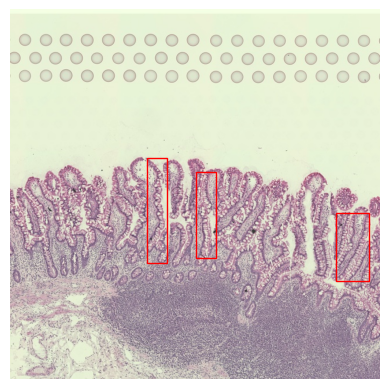

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

def convert_to_bounding_boxes(polygon_coords):
    bounding_boxes = []
    for polygon in polygon_coords:
        # Initialize min and max coordinates
        min_x = min_y = float('inf')
        max_x = max_y = float('-inf')

        # Determine the min and max x, y values
        for (x, y) in polygon:
            if x < min_x:
                min_x = x
            if x > max_x:
                max_x = x
            if y < min_y:
                min_y = y
            if y > max_y:
                max_y = y

        # Calculate width and height
        width = max_x - min_x
        height = max_y - min_y

        # Store the bounding box
        bounding_boxes.append((min_x, min_y, width, height))

    return bounding_boxes

def plot_bounding_boxes(image_path, bounding_boxes):
    img = Image.open(image_path)
    fig, ax = plt.subplots()
    ax.imshow(img)

    # Plot each bounding box
    for (x, y, width, height) in bounding_boxes:
        # Create a Rectangle patch
        rect = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

    plt.axis('off')
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0)  # Save the figure
    plt.show()  # Show the plot for visualization

# Example usage
polygon_coords = [[(612, 352), (612, 352), (610, 352), (610, 354), (610, 362), (609, 362), (609, 366), (608, 367), (608, 372), (607, 374), (607, 377), (606, 378), (606, 380), (604, 380), (604, 384), (604, 386), (604, 390), (602, 392), (602, 394), (602, 395), (602, 396), (600, 397), (600, 398), (600, 399), (600, 400), (599, 402), (599, 402), (597, 404), (597, 406), (596, 407), (596, 409), (595, 410), (595, 410), (594, 412), (594, 412), (592, 414), (592, 415), (592, 416), (592, 418), (590, 419), (590, 420), (589, 422), (589, 422), (588, 424), (588, 424), (587, 426), (587, 427), (584, 430), (584, 430), (582, 432), (582, 432), (580, 435), (580, 436), (580, 437), (580, 438), (579, 439), (579, 440), (576, 444), (576, 444), (575, 446), (575, 447), (570, 452), (569, 452), (568, 452), (567, 452), (566, 454), (566, 455), (564, 456), (564, 459), (564, 460), (564, 464), (564, 466), (564, 468), (566, 469), (569, 469), (570, 468), (570, 468), (572, 467), (572, 467), (574, 466), (576, 466), (577, 464), (580, 464), (582, 466), (584, 466), (584, 467), (590, 467), (590, 466), (592, 466), (596, 462), (597, 462), (598, 460), (598, 460), (602, 455), (602, 454), (606, 450), (606, 450), (607, 449), (607, 448), (608, 447), (608, 446), (609, 444), (609, 444), (610, 442), (610, 442), (610, 440), (610, 439), (612, 438), (612, 437), (614, 435), (614, 434), (615, 432), (615, 430), (616, 429), (616, 428), (617, 427), (617, 426), (618, 424), (618, 420), (619, 419), (619, 414), (620, 412), (620, 410), (620, 410), (620, 408), (622, 407), (622, 404), (620, 402), (620, 402), (619, 400), (619, 399), (618, 398), (618, 396), (619, 395), (619, 392), (620, 390), (620, 389), (620, 388), (620, 387), (622, 386), (622, 382), (622, 382), (622, 359), (622, 358), (622, 357), (620, 355), (620, 354), (618, 352)], [(237, 256), (236, 257), (236, 268), (237, 270), (237, 271), (238, 272), (238, 272), (240, 275), (240, 276), (241, 277), (241, 278), (244, 281), (244, 282), (244, 282), (244, 284), (246, 284), (246, 286), (247, 287), (247, 288), (248, 290), (248, 297), (247, 298), (247, 307), (248, 308), (248, 315), (247, 316), (247, 320), (246, 320), (246, 324), (247, 326), (247, 330), (248, 330), (248, 337), (248, 338), (248, 340), (250, 342), (250, 344), (251, 346), (251, 358), (252, 359), (252, 372), (251, 372), (251, 375), (248, 377), (248, 382), (248, 382), (248, 384), (247, 384), (247, 387), (248, 388), (248, 392), (250, 395), (252, 395), (255, 397), (255, 398), (252, 400), (252, 402), (252, 404), (252, 406), (252, 407), (252, 410), (252, 410), (252, 412), (255, 414), (255, 429), (256, 430), (256, 434), (258, 437), (262, 437), (264, 438), (266, 438), (267, 437), (268, 437), (268, 436), (268, 435), (268, 434), (270, 432), (270, 430), (271, 430), (271, 429), (270, 428), (270, 427), (268, 426), (268, 422), (270, 422), (270, 420), (271, 419), (271, 406), (270, 404), (270, 404), (268, 402), (268, 402), (268, 400), (268, 399), (266, 397), (266, 396), (264, 396), (262, 395), (262, 395), (260, 392), (260, 392), (258, 390), (258, 388), (260, 387), (260, 382), (258, 382), (260, 380), (264, 380), (267, 379), (267, 378), (268, 377), (268, 372), (267, 372), (267, 369), (268, 368), (268, 354), (267, 352), (267, 346), (266, 344), (266, 342), (264, 340), (264, 339), (264, 338), (264, 330), (262, 330), (262, 329), (264, 328), (264, 295), (264, 294), (264, 288), (264, 287), (264, 284), (262, 282), (262, 278), (262, 278), (262, 276), (260, 274), (260, 272), (258, 271), (258, 270), (254, 266), (254, 264), (252, 264), (252, 264), (250, 262), (250, 261), (248, 261), (244, 257), (242, 257), (242, 256)], [(332, 281), (330, 282), (330, 282), (332, 284), (332, 284), (332, 286), (332, 287), (332, 288), (332, 297), (330, 298), (330, 308), (330, 310), (330, 312), (329, 314), (329, 330), (328, 330), (328, 335), (327, 336), (327, 338), (326, 339), (326, 340), (324, 340), (324, 342), (324, 342), (324, 346), (322, 347), (322, 350), (324, 352), (324, 354), (327, 357), (327, 358), (328, 359), (328, 360), (329, 360), (329, 364), (330, 364), (330, 375), (330, 376), (330, 399), (330, 400), (330, 404), (329, 404), (329, 409), (330, 410), (330, 412), (332, 414), (332, 414), (334, 415), (336, 415), (339, 418), (339, 420), (340, 422), (340, 424), (340, 426), (340, 427), (340, 429), (340, 430), (340, 430), (342, 429), (342, 428), (344, 427), (344, 427), (346, 426), (346, 424), (349, 422), (349, 420), (350, 420), (350, 418), (350, 417), (350, 400), (350, 400), (350, 382), (350, 382), (350, 375), (352, 374), (352, 374), (352, 372), (354, 370), (354, 369), (355, 368), (355, 367), (357, 364), (357, 358), (356, 357), (356, 352), (355, 350), (355, 344), (354, 342), (354, 340), (352, 340), (352, 339), (352, 338), (352, 337), (350, 336), (350, 332), (350, 332), (350, 330), (348, 329), (348, 328), (347, 327), (347, 324), (346, 322), (346, 320), (344, 320), (344, 318), (344, 318), (344, 316), (342, 315), (342, 287), (344, 286), (344, 284), (342, 284), (342, 282), (342, 282), (340, 282), (340, 281)]]

# Convert polygons to bounding boxes
bounding_boxes = convert_to_bounding_boxes(polygon_coords)
print(bounding_boxes)

# Specify the path to your image
image_path = '/content/crypt_segmentation_2-1/test_new/patch_4.jpg'  # Replace with your actual image path
output_path = '/content/crypt_segmentation_2-1/test.jpg'

# Plotting the image with bounding boxes
plot_bounding_boxes(image_path, bounding_boxes)





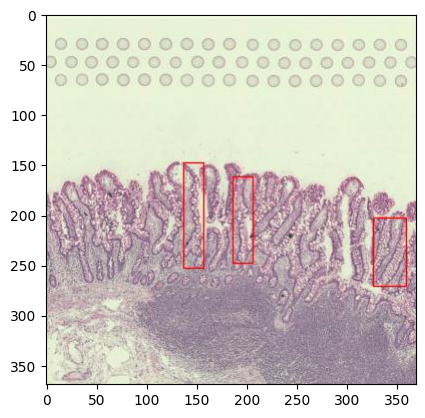

In [13]:
img2 = sq.im.ImageContainer('/content/crypt_segmentation_2-1/test.jpg')
plt.imshow(img2['image'][:,:,0])